<a href="https://colab.research.google.com/github/aaoiii/5th-Mid-DL/blob/12%EC%A3%BC%EC%B0%A8/Intro_to_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01. a single neuron**

In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


In [3]:
import pandas as pd

red_wine = pd.read_csv('red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.shape

(1599, 12)

### 1. input shape 정하기

- target 값은 quality
- input_shape for keras model : target 을 제외한 feature 칼럼의 수!

In [6]:
input_shape=11

### 2. linear model 정의

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

lm=keras.Sequential([
    layers.Dense(units=1,input_shape=[11])
])

### 3. weights 확인


In [8]:
lm.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
 array([[-0.0982812 ],
        [ 0.3144588 ],
        [ 0.7040761 ],
        [-0.19241977],
        [ 0.56028634],
        [ 0.2829451 ],
        [ 0.4876812 ],
        [ 0.16754955],
        [ 0.05256134],
        [-0.54867625],
        [-0.2922282 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [9]:
w,b=lm.weights

In [13]:
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.0982812 ],
       [ 0.3144588 ],
       [ 0.7040761 ],
       [-0.19241977],
       [ 0.56028634],
       [ 0.2829451 ],
       [ 0.4876812 ],
       [ 0.16754955],
       [ 0.05256134],
       [-0.54867625],
       [-0.2922282 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


- input_shape=[3] 라고 설정하는 것은 vectors of length 3, like [0.2, 0.4, 0.6] 을 accept하는 network를 생성하는 것

### 3. plot

4/4 [==============================] - 0s 4ms/step


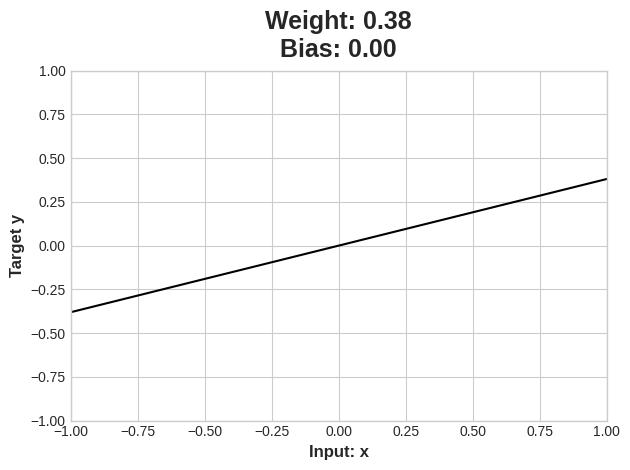

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.xlabel("Input: x")
plt.ylabel("Target y")

w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## 02. **deep neural networks**

- Neural networks typically organize their neurons into layers.
- When we collect linear units having a common set of inputs = **dense layer**

-  **activation function** = function we apply to each of a layer's outputs (non linear 하게 만들어준다)

- hidden layers



In [15]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [16]:
import pandas as pd

concrete = pd.read_csv('concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
concrete.shape

(1030, 9)

- input_shape=[8] or (8,)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(units=512,activation='relu',input_shape=[8]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(1)
])

In [20]:
#model = keras.Sequential([
#    layers.Dense(32, activation='relu', input_shape=[8]),
#    layers.Dense(32, activation='relu'),
#    layers.Dense(1),
#])

# 위의 모델을 activation 함수를 따로 분리해서 쓰기

model = keras.Sequential([
    layers.Dense(32,input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

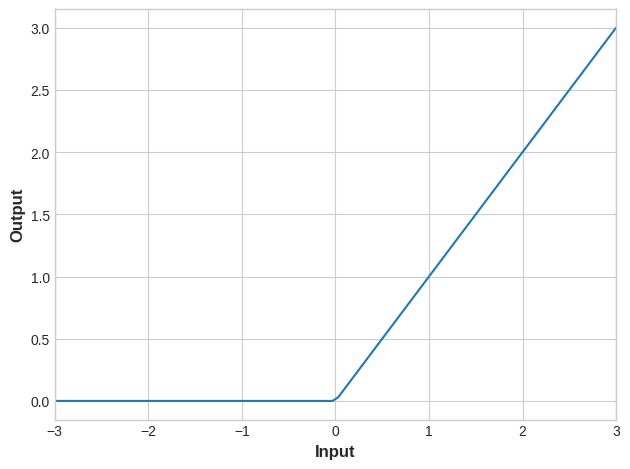

In [21]:
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

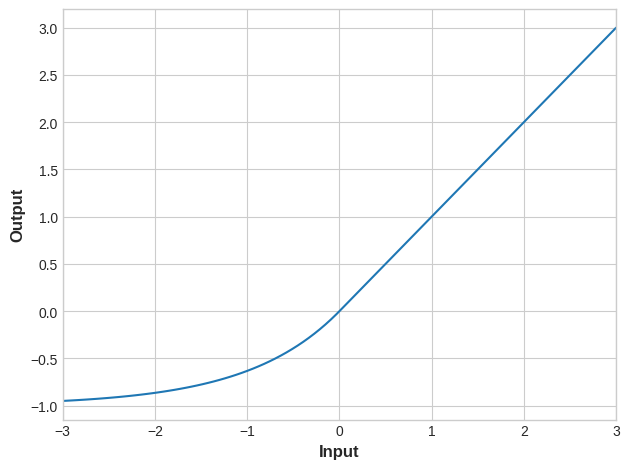

In [22]:
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

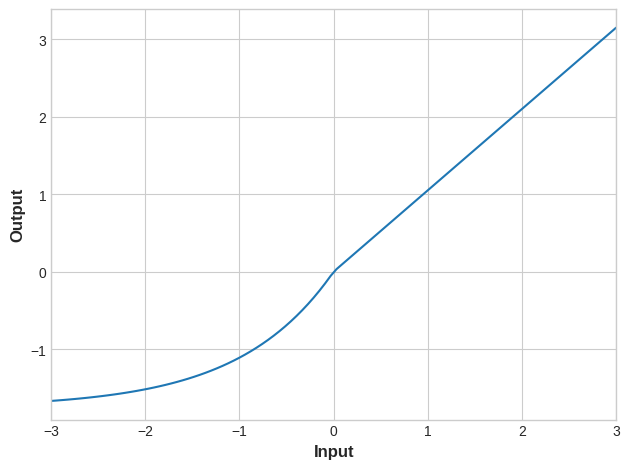

In [23]:
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## **03. stochastic gradient descent**

- loss function : measures the disparity between the the target's true value and the value the model predicts.

- common loss function for regression problems is the mean absolute error or mse

- optimizer : algorithm that adjusts the weights to minimize the loss
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

- minibatch, epoch, learning rate, Adam(adaptive learning rate 있는 SGD 알고리즘)

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [26]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [28]:
model.compile(optimizer='adam',loss='mae')

In [29]:
history = model.fit(X,y,batch_size=128,epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 6ms/step - loss: 2.8996
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 1.2572
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7009
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.3949
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2874
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 0.1737
Epoch 8/200
9/9 [==============================] - 0s 11ms/step - loss: 0.1397
Epoch 9/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1159
Epoch 10/200
9/9 [==============================] - 0s 10ms/step - loss: 0.0972
Epoch 11/200
9/9 [==============================] - 0s 10ms/step - loss: 0.0833
Epoch 12/200
9/9 [==============================] - 0s 11ms/step - loss: 0.0759
Epoch 13/200
9/9 [==============================] - 0s

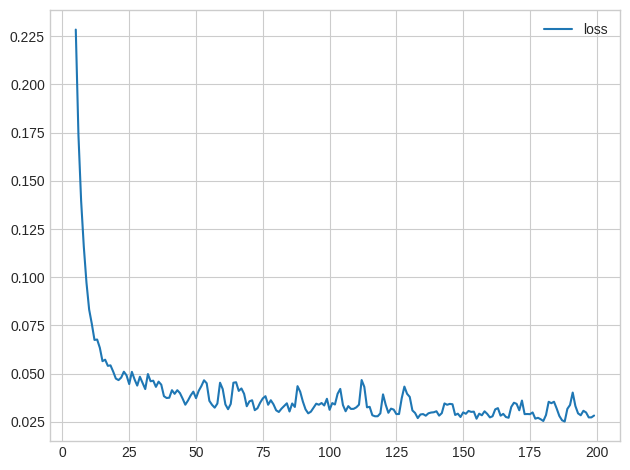

In [30]:
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot();

### **04. overfitting and underfitting**

- signal / noise
- training loss will go down either when the model learns signal or when it learns noise
- validation loss will go down only when the model learns signal

- **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough signal

- **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much noise

- **capacity** : size and complexity of the patterns it is able to learn

-  **early stopping** : stop the training whenever it seems the validation loss isn't decreasing anymore

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [17]


Minimum Validation Loss: 0.1964


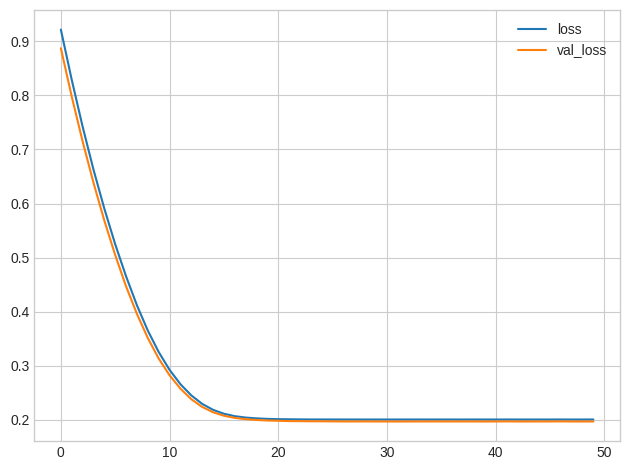

In [34]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.1964


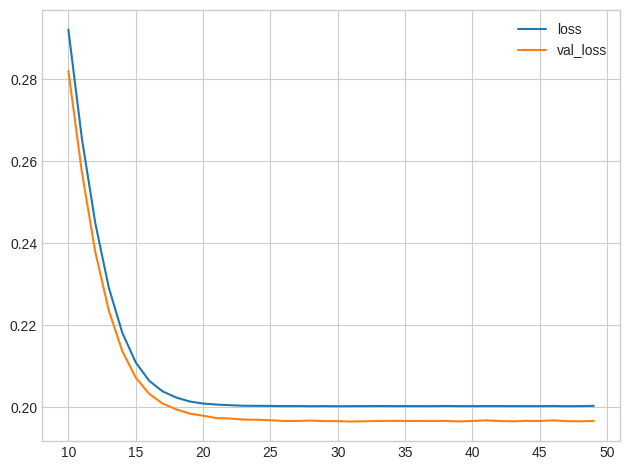

In [35]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

Epoch 1/50
38/38 [==============================] - 2s 14ms/step - loss: 0.2446 - val_loss: 0.2122
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.2074 - val_loss: 0.2049
Epoch 3/50
38/38 [==============================] - 0s 7ms/step - loss: 0.2006 - val_loss: 0.1996
Epoch 4/50
38/38 [==============================] - 0s 11ms/step - loss: 0.1973 - val_loss: 0.1985
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 0.1948 - val_loss: 0.2004
Epoch 6/50
38/38 [==============================] - 0s 10ms/step - loss: 0.1941 - val_loss: 0.1983
Epoch 7/50
38/38 [==============================] - 1s 16ms/step - loss: 0.1919 - val_loss: 0.1968
Epoch 8/50
38/38 [==============================] - 1s 13ms/step - loss: 0.1909 - val_loss: 0.1971
Epoch 9/50
38/38 [==============================] - 0s 12ms/step - loss: 0.1898 - val_loss: 0.1970
Epoch 10/50
38/38 [==============================] - 0s 10ms/step - loss: 0.1880 - val_loss: 0.2030
Epoch 11/50

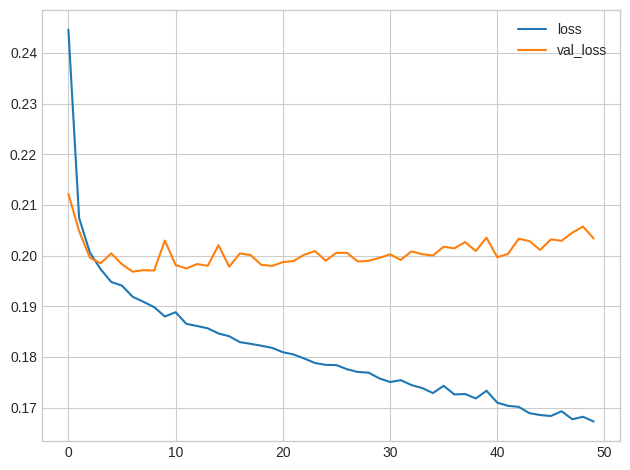

In [36]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

### 05. **Dropout and Batch Normalization**

- layers.dropout(rate= )

- Batch Normalization :
1. normalize the batch with its own mean and standard deviation
2. put the data on a new scale with two trainable rescaling parameters

- layers.BatchNormalization()

In [37]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

Minimum Validation Loss: 0.1934


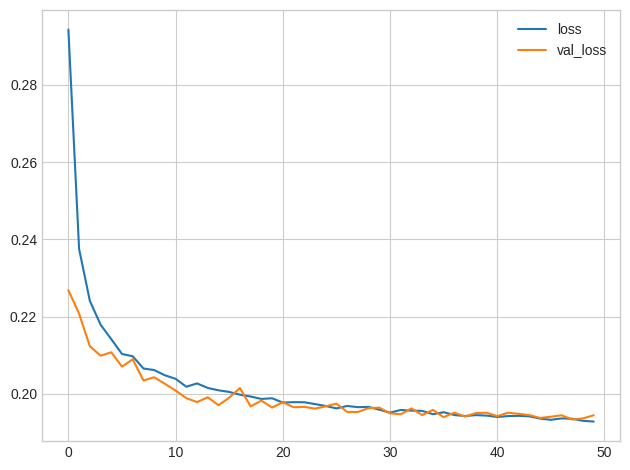

In [38]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

- dropout가 overfitting을 prevent

In [39]:
import pandas as pd

concrete = pd.read_csv('concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

Minimum Validation Loss: nan


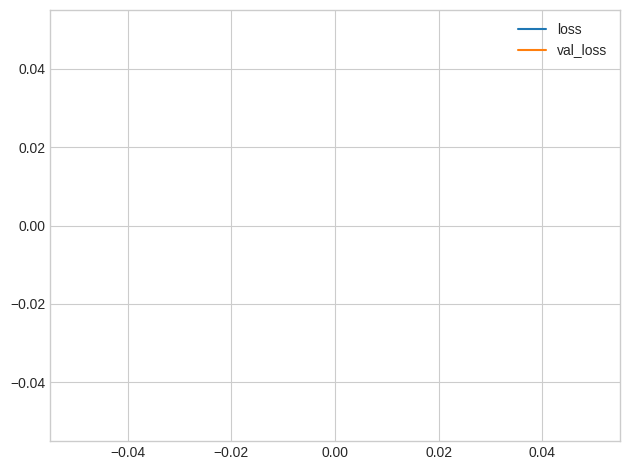

In [40]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

- converge to a large number => fail to train this dataset to network

In [41]:
#BatchNormalization 추가하기

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Minimum Validation Loss: 4.0519


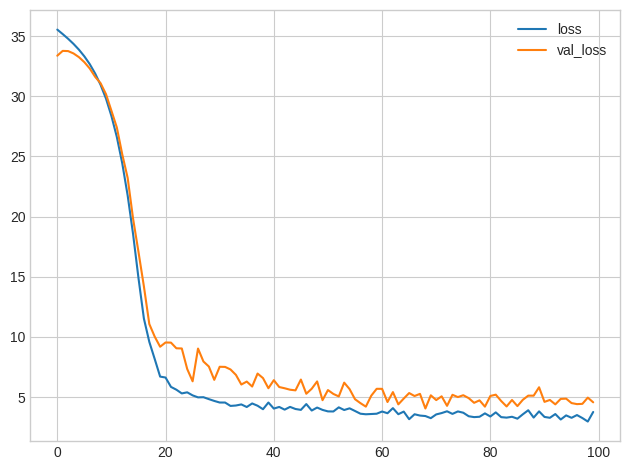

In [42]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

### **06. Binary Classification**

- Accuracy : ratio of correct predictions to total predictions
  - accuracy = number_correct / total

  - Cross-entropy : measure for the distance from one probability distribution to another

In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [44]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),


    layers.Dense(1, activation='sigmoid'),

])

In [45]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
175/175 [==============================] - 6s 18ms/step - loss: 0.4795 - binary_accuracy: 0.7727 - val_loss: 0.4290 - val_binary_accuracy: 0.8040
Epoch 2/200
175/175 [==============================] - 3s 16ms/step - loss: 0.4228 - binary_accuracy: 0.8005 - val_loss: 0.4006 - val_binary_accuracy: 0.8126
Epoch 3/200
175/175 [==============================] - 5s 26ms/step - loss: 0.4089 - binary_accuracy: 0.8085 - val_loss: 0.3928 - val_binary_accuracy: 0.8192
Epoch 4/200
175/175 [==============================] - 3s 15ms/step - loss: 0.4023 - binary_accuracy: 0.8112 - val_loss: 0.3887 - val_binary_accuracy: 0.8218
Epoch 5/200
175/175 [==============================] - 3s 15ms/step - loss: 0.3978 - binary_accuracy: 0.8129 - val_loss: 0.3843 - val_binary_accuracy: 0.8227
Epoch 6/200
175/175 [==============================] - 3s 16ms/step - loss: 0.3932 - binary_accuracy: 0.8164 - val_loss: 0.3809 - val_binary_accuracy: 0.8269
Epoch 7/200
175/175 [==============================]

<Axes: title={'center': 'Accuracy'}>

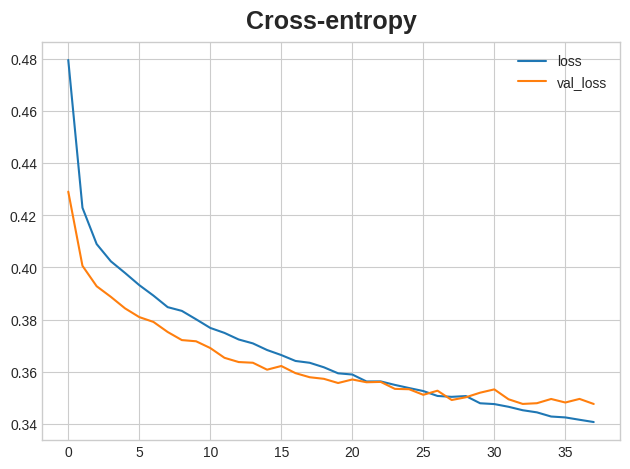

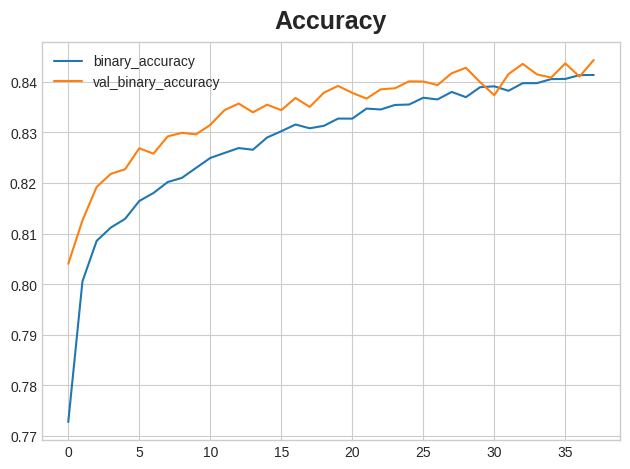

In [46]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")